### For colab:
Install libs

In [ ]:
import nltk
nltk.download('treebank')
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
!pip install rusenttokenize

In [ ]:
!pip install -U pymorphy2==0.8

### Load data

In [ ]:
!wget -O negative.txt https://raw.githubusercontent.com/king-menin/mipt-nlp2021/master/seminars/sem1/negative.txt
!wget -O positive.txt https://raw.githubusercontent.com/king-menin/mipt-nlp2021/master/seminars/sem1/positive.txt

In [4]:
!ls

negative.txt  positive.txt  sample_data


# Часть 1. Предобработка текста и классификация

In [5]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
np.random.seed(1)

## 1.1 Прочитайте текст в файлах positive.txt и negative.txt

In [6]:
with open("positive.txt", "r", encoding="utf-8") as file:
    positive_plain = file.read()

with open("negative.txt", "r", encoding="utf-8") as file:
    negative_plain = file.read()

In [7]:
print(positive_plain[:400], negative_plain[:400], sep="\n\n")

@first_timee хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа). Да, все-таки он немного похож на него Но мой мальчик все равно лучше:D. RT @KatiaCheh: Ну ты идиотка) я испугалась за тебя!!!. RT @digger2912: "Кто то в углу сидит и погибает от голода, а мы ещё 2 порции взяли, хотя уже и так жрать не хотим" :DD . @irina_dyshkant Вот что значит страшилка :D

Но бли

на работе был полный пиддес :| и так каждое закрытие месяца, я же свихнусь так D:. Коллеги сидят рубятся в Urban terror, а я из-за долбанной винды не могу :(. @elina_4post как говорят обещаного три года ждут((. Желаю хорошего полёта и удачной посадки,я буду очень сильно скучать( . Обновил за каким-то лешим surf, теперь не работает простоплеер :(. Котёнка вчера носик разбила, плакала и расстраивала


## 1.2. Разбейте данные на предложения

Для токенизации используйте nltk.sent_tokenize. чтобы удалить имен пользователей из сообщений напишите регулярное выражение.

<b>Классы символов в регулярных выражениях</b>:

[A-Z] – символы верхнего регистра (латиница)

[a-z] – символы нижнего регистра (латиница)

[А-Я] – символы верхнего регистра (кириллица)

[а-я] – символы нижнего регистра (кириллица)

[0-9] или \d – цифра

[^0-9] или \D – любой символ, кроме цифры

. – Один любой символ, кроме новой строки \n.

? – 0 или 1 вхождение шаблона слева

\+ – 1 и более вхождений шаблона слева

\* – 0 и более вхождений шаблона слева

\w – Любая цифра или буква (\W — все, кроме буквы или цифры)

\d – Любая цифра [0-9] (\D — все, кроме цифры)

\s – Любой пробельный символ (\S — любой непробельнй символ)

\b – Граница слова

[..] – дин из символов в скобках ([^..] — любой символ, кроме тех, что в скобках)

\ – Экранирование специальных символов (\. означает точку или \+ — знак «плюс»)

^ и $ – Начало и конец строки соответственно

{n,m} – От n до m вхождений ({,m} — от 0 до m)

a|b – Соответствует a или b

() – Группирует выражение и возвращает найденный текст

\t, \n, \r – Символ табуляции, новой строки и возврата каретки соответственно

In [8]:
import string

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
import re
from nltk import sent_tokenize
# from rusenttokenize import ru_sent_tokenize


def split_data(text): 
  # Избавляемся от имен пользователей, указанных в письмах
  name = re.compile(" (@(\w|\_)*)\W")
  res = name.sub("", text) # strip("\"#$%& \ () *+,-./:;<=>?@[1]_{1}")
  # Удалите лишние переносы строк и разбейте на предложения по знаку "."
  res = sent_tokenize(res.replace("\n", ""))
  # res = ru_sent_tokenize(res.replace("\n", " "))
  return res 


In [11]:
positive = split_data(positive_plain)
negative = split_data(negative_plain)

In [12]:
print(positive[0])

@first_timee хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа).


In [13]:
len(positive), len(negative)

(4457, 4860)

In [14]:
pos_labels = [1] * len(positive)

In [15]:
neg_labels = [0] * len(negative)

Объединим все в один список

In [16]:
all_text = positive + negative
all_labels = pos_labels + neg_labels

In [17]:
len(all_text)

9317

## 1.3. Удалите пустые строки, если они есть

In [18]:
all_text_ = []
all_labels_ = []

for text, label in zip(all_text, all_labels):
  if len(text) > 1:
    all_text_.append(text)
    all_labels_.append(label)

all_text = all_text_
all_labels = all_labels_

## 1. 4. Предварительный анализ коллекции

#### Средняя длина предложений

In [19]:
import pandas as pd

In [20]:
df = pd.DataFrame(all_text)

In [21]:
len_data = df[0].apply(len)

In [22]:
len_data.describe()

count    9254.000000
mean       76.079533
std        53.813385
min         2.000000
25%        41.000000
50%        63.000000
75%        99.750000
max       580.000000
Name: 0, dtype: float64

#### Длины текстов в символах

In [23]:
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


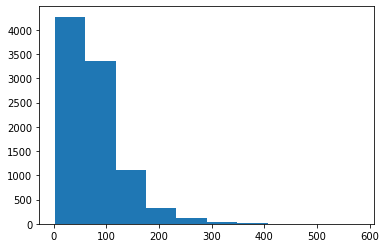

In [24]:
fig, ax = plt.subplots()

n, bins, patches = ax.hist(len_data.tolist())

fig.show()

#### Самые частые слова

Токенизируйте предложения на слова (nltk.word_tokenize)

In [25]:
from nltk import word_tokenize


all_text = [word_tokenize(line) for line in all_text]

In [26]:
from nltk import FreqDist


n_types = []
n_tokens = []
fd = FreqDist()
for line in all_text:
    fd.update(line)
    n_types.append(len(fd))
    n_tokens.append(sum(list(fd.values())))
for i in fd.most_common(10):
    print(i)

('(', 9258)
(')', 8719)
(',', 8270)
('.', 7114)
(':', 4787)
('не', 2960)
('!', 2899)
('и', 2335)
('в', 2294)
('я', 2133)


#### Закон Ципфа

В любом достаточно большом тексте ранг типа обратно пропорционален его частоте: f=a/r

f – частота типа, r – ранг типа, a – параметр, для славянских языков – около 0.07

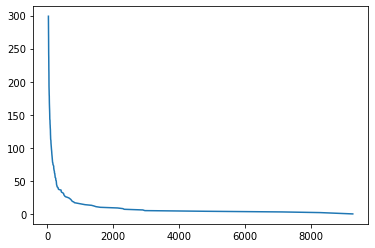

In [27]:
freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

#### Закон Хипса

С увеличением длины текста (количества токенов), количество типов увеличивается в соответствии с законом: |V|=K∗N^b

N – число токенов, |V| – количество типов в словаре, K,b – параметры, обычно K∈[10,100],b∈[0.4,0.6]

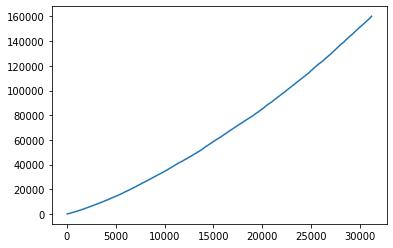

In [28]:
fig, ax = plt.subplots()
ax.plot(n_types, n_tokens)
plt.show()

## 1.5. Подготовим данные для nltk.NaiveBayesClassifier

Классификатор принимает данные о предложении в виде словаря {"слово": #количество встреч в предожении}

Используйсте Counter. Пример работы:

`Counter('abracadabra')`

>Counter({'a': 5, 'b': 2, 'c': 1, 'd': 1, 'r': 2})

In [29]:
from collections import Counter

In [30]:
print(all_text[0])

['@', 'first_timee', 'хоть', 'я', 'и', 'школота', ',', 'но', 'поверь', ',', 'у', 'нас', 'то', 'же', 'самое', ':', 'D', 'общество', 'профилирующий', 'предмет', 'типа', ')', '.']


In [31]:
all_text = list(map(Counter, all_text))
print(all_text[0])

Counter({',': 2, '@': 1, 'first_timee': 1, 'хоть': 1, 'я': 1, 'и': 1, 'школота': 1, 'но': 1, 'поверь': 1, 'у': 1, 'нас': 1, 'то': 1, 'же': 1, 'самое': 1, ':': 1, 'D': 1, 'общество': 1, 'профилирующий': 1, 'предмет': 1, 'типа': 1, ')': 1, '.': 1})


## 1.6. Обучим модель

In [32]:
from sklearn.metrics import accuracy_score
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split

In [33]:
train_indecies, test_indecies = train_test_split(np.arange(len(all_text)), test_size=0.3, random_state=1)

In [34]:
all_text = np.array(all_text)
all_labels = np.array(all_labels)

X_train, X_test = all_text[train_indecies], all_text[test_indecies]
y_train, y_test = all_labels[train_indecies], all_labels[test_indecies]

In [35]:
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

### Протестируем качество классификации

In [36]:
pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

0.9200576161325171

## 1.7. Добавим признаков

Для каждого примера добавим количество частей речи в нем. Если мы встретили знак пунктуации, то обозначим его как 'PNCT'.

In [39]:
import pymorphy2

In [40]:
morph = pymorphy2.analyzer.MorphAnalyzer()

In [41]:
morph.parse(".")[0].tag.POS

Используйте pymorphy2.analyzer.MorphAnalyzer.parse

In [51]:
all_text_with_pos = []
for sample in all_text:
    update = Counter(sample)
    for word, count in sample.items():
        pos = str(morph.parse(word)[0].tag.POS)
        if not pos:
          pos = "PNCT"
        update.update({pos: count})
    all_text_with_pos.append(update)

In [52]:
all_text_with_pos = np.array(all_text_with_pos)
all_labels = np.array(all_labels)

X_train, X_test = all_text_with_pos[train_indecies], all_text_with_pos[test_indecies]
y_train, y_test = all_labels[train_indecies], all_labels[test_indecies]

In [53]:
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

In [54]:
pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

0.9171768095066619

### Попробуем лемматизировать слова

Обучите тот же классификатор но на примерах, где все слова в нормальной форме.

In [55]:
all_text_with_pos = []
for sample in all_text:
    update = Counter()
    for word, count in sample.items():
        parsed = morph.parse(word)[0].normal_form
        update.update({parsed: count})
    all_text_with_pos.append(update)

In [56]:
all_text_with_pos = np.array(all_text_with_pos)
all_labels = np.array(all_labels)

X_train, X_test = all_text_with_pos[train_indecies], all_text_with_pos[test_indecies]
y_train, y_test = all_labels[train_indecies], all_labels[test_indecies]

In [57]:
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

0.9193374144760533

### Удалим стоп-слова

In [58]:
from nltk.corpus import stopwords

stops = stopwords.words("russian")

In [60]:
all_text_without_stops = []
for sample in all_text:
    update = Counter()
    for word, count in sample.items():
      if word not in stops:
        update.update({word: count})
    all_text_without_stops.append(update)

In [61]:
all_text_without_stops = np.array(all_text_without_stops)
all_labels = np.array(all_labels)

X_train, X_test = all_text_without_stops[train_indecies], all_text_without_stops[test_indecies]
y_train, y_test = all_labels[train_indecies], all_labels[test_indecies]

In [62]:
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

0.9214980194454447

### Как менялось качество? Почему?

In [ ]:
<your answer here>

# Часть 2. Использование знаний морфологии для генерации текста

Задание: написать шаблон вида: {person} {action} {count} {target}. Где

Person - лицо которое выполняет действие action. Каждое такое действие может быть в трех временах (настоящее, прошедшее и будущее). Действие выполняется с целью target. Такая цель - это некоторый объект или объекты числом count. count>0.

Используйте make_agree_with_number, parse и inflect из библиотеки pymorphy2.

Времена глаголов в документации pymorphy2: past (прошедшее), pres (настоящее), futr (будущее).

In [1]:
import pymorphy2
morph = pymorphy2.analyzer.MorphAnalyzer()

Согласование существительного с числом.

In [2]:
butyavka = morph.parse("бутявка")[0]
butyavka.make_agree_with_number(2)

Parse(word='бутявки', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='бутявка', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'явки', 8, 1), (<UnknownPrefixAnalyzer>, 'бут')))

Чтобы поставить слово в нужную форму используется inflect

In [3]:
butyavka.inflect({'gent'})  # нет кого? (родительный падеж)

Parse(word='бутявки', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='бутявка', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'явки', 8, 1), (<UnknownPrefixAnalyzer>, 'бут')))

In [4]:
butyavka.inflect({'plur', 'gent'})

Parse(word='бутявок', tag=OpencorporaTag('NOUN,inan,femn plur,gent'), normal_form='бутявка', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'явок', 8, 8), (<UnknownPrefixAnalyzer>, 'бут')))

In [5]:
def genarate(person, action, time, count, target):
    # Поставьте action в нужное время
    action = morph.parse(action)[0].inflect({time, "indc"}).word
    # Согласуйте target с числом
    target = morph.parse(target)[0].make_agree_with_number(count).word
    return f"{person} {action} {count} {target}"

In [6]:
genarate("Антон", "продать", "past", 5, "товар")

'Антон продал 5 товаров'